In [7]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

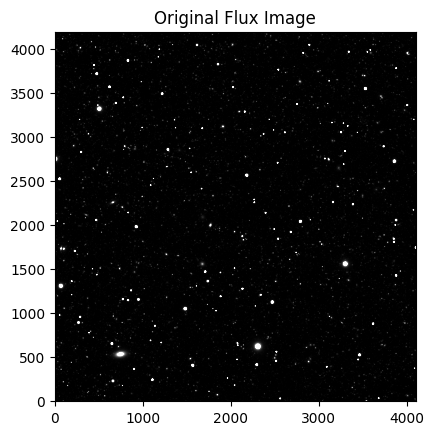

In [5]:
flux_image_hdul = fits.open("retrieved_fits/image0.fits")
flux_image = flux_image_hdul[1].data
plt.imshow(flux_image,vmin=0,vmax=1,cmap='gray', origin='lower');
plt.title("Original Flux Image");

hdul = fits.open("sersic_output/labelled_segmap4.fits")
onion_img = [sum(x) for x in zip(hdul[1].data,hdul[2].data,hdul[3].data,hdul[4].data,hdul[5].data)]

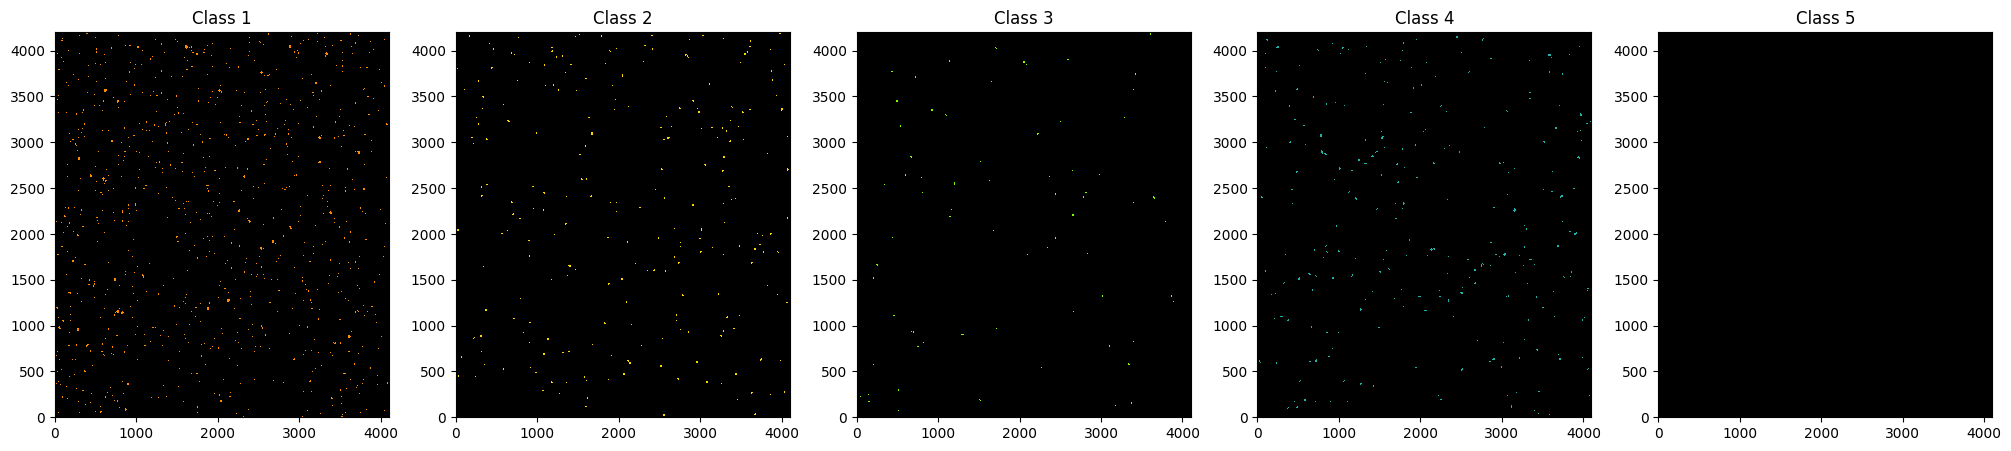

In [6]:
data_list = [i.data for i in hdul[1:]]      
        
cmaps = [ListedColormap(["black","darkorange"]),ListedColormap(["black","gold"]),ListedColormap(["black","lawngreen"]),ListedColormap(["black","lightseagreen"]),ListedColormap(["black","red"])]
n = len(cmaps)

fig, axes = plt.subplots(1, n, figsize=(25,5))#, squeeze=False)     

count = 0
for [ax, cmap] in zip(axes.flat, cmaps):
    psm = ax.pcolormesh(data_list[count], cmap=cmap, vmin=0, vmax=count+1) #  rasterized=True
    # fig.colorbar(psm, ax=ax)
    ax.title.set_text(f"Class {count+1}")
    count+=1
plt.show()
        

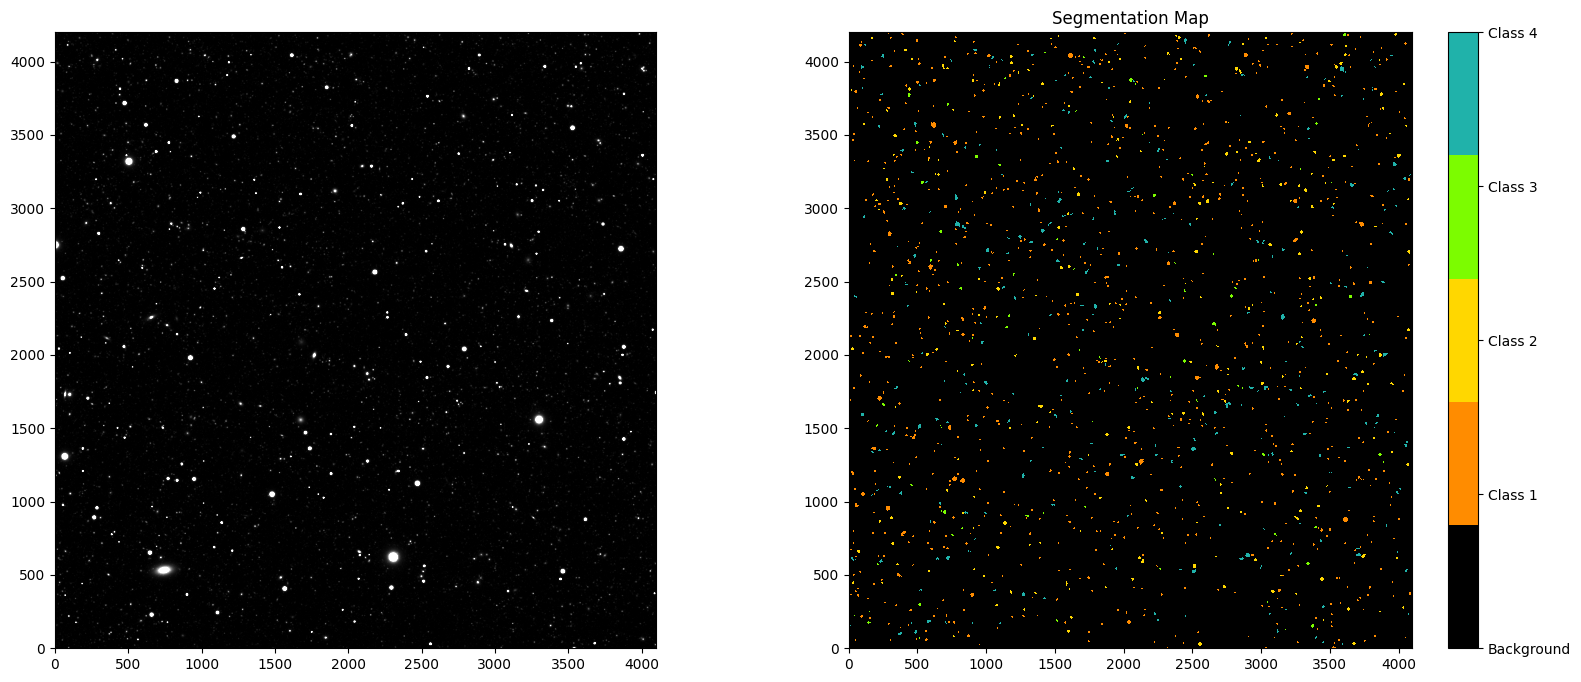

In [16]:
cmaps = [ListedColormap(["black","darkorange", "gold", "lawngreen", "lightseagreen"])]
data = onion_img 


n = len(cmaps) +1 
fig, axs = plt.subplots(1, n, figsize=(20,8))
axs[0].imshow(flux_image,vmin=0,vmax=1,cmap='gray', origin='lower');


for [ax, cmap] in zip(axs[1:].flat, cmaps):
    psm = ax.pcolormesh(data, cmap=cmap, vmin=0, vmax=4)
    cbar = fig.colorbar(psm, ax=ax, ticks=[0,1,2,3,4])
    cbar.ax.set_yticklabels(['Background','Class 1', 'Class 2', 'Class 3', 'Class 4'])
    
plt.title("Segmentation Map")
plt.show()
